In [2]:
!pip install tensorflow pandas

In [2]:
!pip install --force-reinstall "numpy<2" pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 503.6 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 718.5 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 488.2 kB/s eta 0:00:0000:0100:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 548.6 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.9/229.9 kB 821.5 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 509.2/509.2 kB 860.4 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.8/347.8 kB 689.3 kB/s eta 0:00:00a 0:00:01
  Attempting uninstall: pytz
    Found existing installation: pytz 2023.3.post1
    Uninstalling pytz-2023.3.post1:
      Successfully uninstalled pytz-2023.3.post1
  Attempting uninstall: tzdata
    Found existing installation: tzdata 2023.3
    Uninstalling tzdata-2023.3:
      Successfully uninstalled tzdata-2023.3
  Attempting uninstall: six
    Found existing in


🚀 STARTING ADVANCED TRAINING PIPELINE (METRICS UPGRADE)

📂 Loading Data from: /data/final_data.csv...
   ✅ Loaded 574 total rows.

🛠️ Preprocessing Common Features...


/tmp/ipykernel_17965/166631571.py:86: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_raw['price_clean'].fillna(median_price, inplace=True)


   ✅ Identified 262 amenity features.
   📊 Data Split: 574 Labeled | 0 Unlabeled

⚔️  Comparing 5 Strategies...

   🔹 Strategy: Delete
      📊 RMSE: 1.3196 | R2: -19.3147 | Acc(±1★): 39.1%

   🔹 Strategy: Mean
      📊 RMSE: 1.1264 | R2: -13.8019 | Acc(±1★): 55.7%

   🔹 Strategy: Median
      📊 RMSE: 1.0884 | R2: -12.8221 | Acc(±1★): 58.3%

   🔹 Strategy: Mode
      📊 RMSE: 1.2166 | R2: -16.2687 | Acc(±1★): 42.6%

   🔹 Strategy: KNN
      ⏳ KNN Imputing...
      📊 RMSE: 1.0024 | R2: -10.7220 | Acc(±1★): 66.1%

🏆 --- FINAL SCOREBOARD ---
Strategy      MAE     RMSE         R2     Adj_R2  Accuracy_1_Star
     KNN 0.857014 1.002356 -10.722031 -10.722031        66.086957
  Median 0.961032 1.088447 -12.822077 -12.822077        58.260870
    Mean 1.000146 1.126364 -13.801854 -13.801854        55.652174
    Mode 1.120543 1.216606 -16.268675 -16.268675        42.608696
  Delete 1.192692 1.319551 -19.314736 -19.314736        39.130435

🎉 WINNER: [KNN] (Lowest RMSE)


/tmp/ipykernel_17965/166631571.py:253: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Strategy', y='RMSE', data=results_df, palette='Reds_r')
/opt/conda/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.11/site-packages/seaborn/categorical.py:1273: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warni

   📸 Comparison plot saved to: /data/imputation_strategies_comparison.png

💾 Saving artifacts for (KNN)...
   ✅ Final Data Saved to: /data/hotel_data_processed.joblib



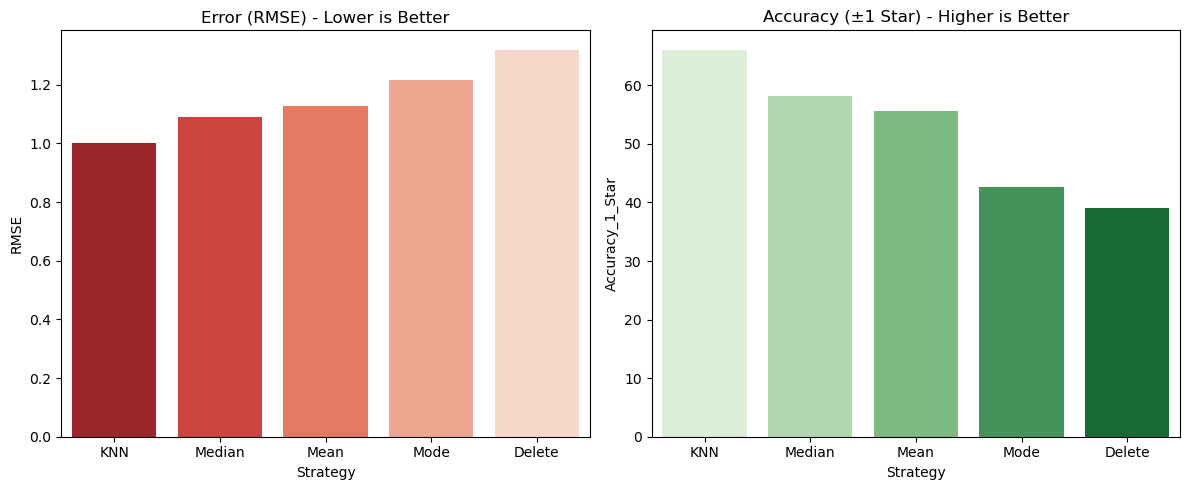

In [12]:
# -*- coding: utf-8 -*-
"""
Advanced Model Training with Imputation Strategy Comparison
Metrics: MAE, RMSE, R2, Adjusted R2, Business Accuracy
"""

import pandas as pd
import numpy as np
import joblib
import os
import sys
import subprocess
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import KNNImputer

# --- Auto-Install Libraries ---
def install(package):
    subprocess.check_call([sys.executable, "-m", "pip", "install", package])

try:
    import matplotlib.pyplot as plt
    import seaborn as sns
except ImportError:
    print("⚠️ Visualization libraries missing. Installing...")
    install("matplotlib")
    install("seaborn")
    import matplotlib.pyplot as plt
    import seaborn as sns

try:
    import tensorflow as tf
    from tensorflow.keras.models import Model
    from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization
    from tensorflow.keras.optimizers import Adam
except ImportError:
    print("⚠️ TensorFlow missing. Installing...")
    install("tensorflow")
    import tensorflow as tf
    from tensorflow.keras.models import Model
    from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization
    from tensorflow.keras.optimizers import Adam

# --- Configuration ---
HOTEL_FILE = '/data/final_data.csv'
MODEL_FILE = '/data/quality_prediction_model.keras'
FEATURE_CONFIG_FILE = '/data/feature_config.joblib'
PRICE_SCALER_FILE = '/data/price_scaler.joblib'
HOTEL_DB_FILE = '/data/hotel_data_processed.joblib'
COMPARISON_PLOT_FILE = '/data/imputation_strategies_comparison.png'

print("\n" + "="*60)
print("🚀 STARTING ADVANCED TRAINING PIPELINE (METRICS UPGRADE)")
print("="*60 + "\n")

# --- 1. Load Data ---
print(f"📂 Loading Data from: {HOTEL_FILE}...")
if not os.path.exists(HOTEL_FILE):
    print(f"❌ Error: File {HOTEL_FILE} not found.")
    sys.exit()

df_raw = pd.read_csv(HOTEL_FILE)
print(f"   ✅ Loaded {len(df_raw)} total rows.")

# Force Target to numeric (Just in case)
df_raw['ai_score'] = pd.to_numeric(df_raw['ai_score'], errors='coerce')

# --- 2. Data Preprocessing ---
print(f"\n🛠️ Preprocessing Common Features...")

# A. Clean Price
def clean_price(price_val):
    if pd.isna(price_val): return np.nan
    price_str = str(price_val).replace(',', '').replace('$', '').replace('€', '').strip()
    if '-' in price_str:
        try:
            low, high = map(float, price_str.split('-'))
            return (low + high) / 2
        except: return np.nan
    try: return float(price_str)
    except ValueError: return np.nan

df_raw['price_clean'] = df_raw['price'].apply(clean_price)
median_price = df_raw['price_clean'].median()
df_raw['price_clean'].fillna(median_price, inplace=True)

# B. Identify Amenity Columns
potential_features = []
exclude_cols = ['price', 'price_clean', 'rating', 'Latitude', 'Longitude', 
                'id', 'sentiment_score', 'ai_score', 'name', 'location', 
                'images', 'gps_link', 'image1', 'image2', 'image3', 'image4', 'image5',
                'amenities', 'OpenCage Note']

for col in df_raw.columns:
    if col in exclude_cols or df_raw[col].dtype == 'object': continue
    unique_vals = df_raw[col].dropna().unique()
    if len(unique_vals) <= 3 and all(v in [0, 1] for v in unique_vals):
        potential_features.append(col)

df_raw[potential_features] = df_raw[potential_features].fillna(0)
print(f"   ✅ Identified {len(potential_features)} amenity features.")

# C. Create Base Feature Matrix (X)
scaler_price = MinMaxScaler()
price_scaled = scaler_price.fit_transform(df_raw[['price_clean']])
X_amenities = df_raw[potential_features].values
X_base = np.hstack([price_scaled, X_amenities])

# D. Split Labeled vs Unlabeled Data
mask_has_score = df_raw['ai_score'].notna()
df_labeled = df_raw[mask_has_score].copy()
df_unlabeled = df_raw[~mask_has_score].copy()

print(f"   📊 Data Split: {len(df_labeled)} Labeled | {len(df_unlabeled)} Unlabeled")

if len(df_labeled) < 10:
    print("❌ Error: Not enough labeled data.")
    sys.exit()

# E. Fixed Test Set
# Force float32 for the test set to allow smooth evaluation
X_labeled = X_base[mask_has_score].astype('float32')
y_labeled = df_labeled['ai_score'].values.astype('float32')

X_train_base, X_test_fixed, y_train_base, y_test_fixed = train_test_split(
    X_labeled, y_labeled, test_size=0.2, random_state=42
)

# --- 3. Define Model Builder ---
def build_model(input_dim):
    inputs = Input(shape=(input_dim,), name="features")
    x = Dense(128, activation='relu')(inputs)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)
    x = Dense(64, activation='relu')(x)
    x = Dropout(0.2)(x)
    outputs = Dense(1, activation='linear', name="score")(x)
    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer=Adam(0.001), loss='mse', metrics=['mae'])
    return model

# --- 4. Strategy Loop ---
strategies = ['Delete', 'Mean', 'Median', 'Mode', 'KNN']
results_list = [] # Changed to list for DataFrame
models = {}

print(f"\n⚔️  Comparing {len(strategies)} Strategies...")

for strategy in strategies:
    print(f"\n   🔹 Strategy: {strategy}")
    
    X_train_current = None
    y_train_current = None
    
    if strategy == 'Delete':
        X_train_current = X_train_base
        y_train_current = y_train_base
        
    elif strategy == 'KNN':
        print("      ⏳ KNN Imputing...")
        y_full_with_nan = df_raw['ai_score'].values.reshape(-1, 1)
        data_for_knn = np.hstack([X_base, y_full_with_nan])
        
        imputer = KNNImputer(n_neighbors=5)
        data_imputed = imputer.fit_transform(data_for_knn)
        
        y_imputed_full = data_imputed[:, -1]
        
        indices_unlabeled = np.where(~mask_has_score)[0]
        X_unlabeled = X_base[indices_unlabeled]
        y_unlabeled_imputed = y_imputed_full[indices_unlabeled]
        
        X_train_current = np.vstack([X_train_base, X_unlabeled])
        y_train_current = np.concatenate([y_train_base, y_unlabeled_imputed])
        
    else:
        # Mean/Median/Mode
        val = 0.0
        if strategy == 'Mean': val = float(df_labeled['ai_score'].mean())
        elif strategy == 'Median': val = float(df_labeled['ai_score'].median())
        elif strategy == 'Mode': val = float(df_labeled['ai_score'].mode()[0])
        
        if len(df_unlabeled) > 0:
            y_filled_unlabeled = np.full(len(df_unlabeled), val)
            indices_unlabeled = np.where(~mask_has_score)[0]
            X_unlabeled = X_base[indices_unlabeled]
            
            X_train_current = np.vstack([X_train_base, X_unlabeled])
            y_train_current = np.concatenate([y_train_base, y_filled_unlabeled])
        else:
            X_train_current = X_train_base
            y_train_current = y_train_base

    # --- Safe Cast (The magic touch) ---
    X_train_current = np.asarray(X_train_current).astype('float32')
    y_train_current = np.asarray(y_train_current).astype('float32')

    # Train Model
    model = build_model(X_train_current.shape[1])
    model.fit(X_train_current, y_train_current, 
              validation_split=0.1, epochs=25, batch_size=32, verbose=0)
    
    # Evaluate on FIXED Test Set
    y_pred = model.predict(X_test_fixed, verbose=0).flatten()
    
    # --- Advanced Metrics Calculation ---
    mae = mean_absolute_error(y_test_fixed, y_pred)
    mse = mean_squared_error(y_test_fixed, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test_fixed, y_pred)
    
    # Adjusted R2
    n = len(y_test_fixed)
    p = X_test_fixed.shape[1]
    if n > p + 1:
        adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    else:
        adj_r2 = r2 # Fallback for small data
        
    # Accuracy within 1 star
    accurate_preds = np.sum(np.abs(y_test_fixed - y_pred) <= 1.0)
    accuracy_within_1_star = (accurate_preds / n) * 100
    
    print(f"      📊 RMSE: {rmse:.4f} | R2: {r2:.4f} | Acc(±1★): {accuracy_within_1_star:.1f}%")
    
    results_list.append({
        'Strategy': strategy,
        'MAE': mae,
        'RMSE': rmse,
        'R2': r2,
        'Adj_R2': adj_r2,
        'Accuracy_1_Star': accuracy_within_1_star
    })
    models[strategy] = model

# --- 5. Select Winner & Save ---
results_df = pd.DataFrame(results_list)
# Sort by RMSE (Lower is better)
results_df = results_df.sort_values('RMSE')

print("\n🏆 --- FINAL SCOREBOARD ---")
print(results_df.to_string(index=False))

best_strategy = results_df.iloc[0]['Strategy']
best_model = models[best_strategy]
print(f"\n🎉 WINNER: [{best_strategy}] (Lowest RMSE)")

# --- Visualization (Dual Plot) ---
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.barplot(x='Strategy', y='RMSE', data=results_df, palette='Reds_r')
plt.title('Error (RMSE) - Lower is Better')

plt.subplot(1, 2, 2)
sns.barplot(x='Strategy', y='Accuracy_1_Star', data=results_df, palette='Greens')
plt.title('Accuracy (±1 Star) - Higher is Better')

plt.tight_layout()
plt.savefig(COMPARISON_PLOT_FILE)
print(f"   📸 Comparison plot saved to: {COMPARISON_PLOT_FILE}")

# Save Artifacts
print(f"\n💾 Saving artifacts for ({best_strategy})...")
best_model.save(MODEL_FILE)

joblib.dump({'amenity_columns': potential_features, 'input_dim': X_base.shape[1]}, FEATURE_CONFIG_FILE)
joblib.dump(scaler_price, PRICE_SCALER_FILE)

# Prepare & Save DB (Using Best Strategy Logic for Filling)
final_df_export = df_raw.copy()

# Apply winning strategy fill logic
if best_strategy == 'Delete':
    # Inference for missing
    mask = final_df_export['ai_score'].isna()
    if mask.sum() > 0:
        X_missing = X_base[mask].astype('float32')
        preds = best_model.predict(X_missing).flatten()
        final_df_export.loc[mask, 'ai_score'] = preds
elif best_strategy == 'KNN':
    y_full = df_raw['ai_score'].values.reshape(-1, 1)
    data_knn = np.hstack([X_base, y_full])
    imputer = KNNImputer(n_neighbors=5)
    imputed = imputer.fit_transform(data_knn)
    final_df_export['ai_score'] = imputed[:, -1]
else:
    # Mean/Median/Mode
    val = 4.0
    if best_strategy == 'Mean': val = float(df_labeled['ai_score'].mean())
    elif best_strategy == 'Median': val = float(df_labeled['ai_score'].median())
    elif best_strategy == 'Mode': val = float(df_labeled['ai_score'].mode()[0])
    final_df_export['ai_score'].fillna(val, inplace=True)

hotel_db = {
    'ids': final_df_export.index.tolist(),
    'names': final_df_export['name'].tolist(),
    'features': X_base,
    'locations': final_df_export[['Latitude', 'Longitude']].to_dict('records'),
    'original_data': final_df_export[['name', 'location', 'price', 'rating', 'ai_score']].to_dict('records')
}
joblib.dump(hotel_db, HOTEL_DB_FILE)
print(f"   ✅ Final Data Saved to: {HOTEL_DB_FILE}")
print("\n" + "="*60)